### nicholas chung
### data607
### 10/24/19

## assignment: web APIs

The New York Times web site provides a rich set of APIs, as described here: https://developer.nytimes.com/apis

You’ll need to start by signing up for an API key.

Your task is to choose one of the New York Times APIs, construct an interface in Python to read in the JSON data, and
transform it into a pandas DataFrame.

### contents
* data selection
* method a
* method b
* analysis
* findings

### data selection

https://developer.nytimes.com/docs/books-product/1/overview
"The lists/names service returns a list of all the NYT Best Sellers Lists. Some lists are published weekly and others monthly. The response includes when each list was first published and last published."

assumptions:
* for purpose of initial investigation, assume that each week has a new list

### method a
summary of approach:
1. define historical scope of analysis
2. retrieve data from API
3. transform raw data into dataframe
4. save dataframe to CSV

In [2]:
import config
import datetime
import time
import requests

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
# define how far back we want to go in our analysis 
weeks = []

# append dates for each of week of the past "years" years to list
years = 1
days = years * 365

for i in range(0, days, 7):
    weeks.append((datetime.date.today() - datetime.timedelta(i)).isoformat())
    
print(len(weeks), weeks[0:3])

# store API key as "key" for easy reference   
key = config.secret

53 ['2019-10-26', '2019-10-19', '2019-10-12']


In [3]:
# confirm authentication and successful HTTPS request
r = requests.get('https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key=' + key)
r.status_code

200

In [69]:
# store URL as fragments for ease of reuse
url_a = "https://api.nytimes.com/svc/books/v3/" 
url_b = "lists/" 
url_d = "/hardcover-fiction.json?" 

books = []
book = {}

# grab values for each object returned, then store as list of dicts
for c in weeks:
    r = requests.get(url_a + url_b + c + url_d + "api-key=" + key)
    time.sleep(6) # rate limit guidance as per https://developer.nytimes.com/faq#a11
    for i in r.json()['results']['books']:
        # create dictionary for each result
        book = {
            "date": c,
            "title": i['title'], 
            "rank": i['rank'], 
            "rank_last_week": i['rank_last_week'], 
            "weeks_on_list": i['weeks_on_list'], 
            "description": i['description'], 
            "publisher": i['publisher'], 
            "author": i['author']
        }
        # append dictionary to list
        books.append(book)

# store list of dictionanies to dataframe
books_df = pd.DataFrame(books)
books_df

,date,title,rank,rank_last_week,weeks_on_list,description,publisher,author
0,2019-10-25,THE 19TH CHRISTMAS,1,0,1,In the 19th installment of the Women's Murder ...,"Little, Brown",James Patterson and Maxine Paetro
1,2019-10-25,WHERE THE CRAWDADS SING,2,3,58,A woman who survived alone in the marsh become...,Putnam,Delia Owens
2,2019-10-25,WHAT HAPPENS IN PARADISE,3,0,1,"In the sequel to ""Winter in Paradise,"" Irene S...","Little, Brown",Elin Hilderbrand
3,2019-10-25,NINTH HOUSE,4,0,1,After mysteriously surviving a multiple homici...,Flatiron,Leigh Bardugo
4,2019-10-25,THE INSTITUTE,5,2,5,Children with special talents are abducted and...,Scribner,Stephen King
...,...,...,...,...,...,...,...,...
790,2018-10-26,ALASKAN HOLIDAY,11,4,2,"A Seattleite cook stuck in remote Ponder, Alas...",Ballantine,Debbie Macomber
791,2018-10-26,LETHAL WHITE,12,7,4,The fourth book in the Cormoran Strike series....,"Mulholland/Little, Brown",Robert Galbraith
792,2018-10-26,JUROR #3,13,6,5,Ruby Bozarth defends a college football star c...,"Little, Brown",James Patterson and Nancy Allen
793,2018-10-26,AN ABSOLUTELY REMARKABLE THING,14,3,3,"After posting a video that goes viral, April M...",Dutton,Hank Green


In [58]:
# save point
books_df.to_csv("books.csv")
books_df = pd.read_csv("books.csv", index_col = 0)
books_df

,date,title,rank,rank_last_week,weeks_on_list,description,publisher,author
0,2019-10-25,THE 19TH CHRISTMAS,1,0,1,In the 19th installment of the Women's Murder ...,"Little, Brown",James Patterson and Maxine Paetro
1,2019-10-25,WHERE THE CRAWDADS SING,2,3,58,A woman who survived alone in the marsh become...,Putnam,Delia Owens
2,2019-10-25,WHAT HAPPENS IN PARADISE,3,0,1,"In the sequel to ""Winter in Paradise,"" Irene S...","Little, Brown",Elin Hilderbrand
3,2019-10-25,NINTH HOUSE,4,0,1,After mysteriously surviving a multiple homici...,Flatiron,Leigh Bardugo
4,2019-10-25,THE INSTITUTE,5,2,5,Children with special talents are abducted and...,Scribner,Stephen King
...,...,...,...,...,...,...,...,...
790,2018-10-26,ALASKAN HOLIDAY,11,4,2,"A Seattleite cook stuck in remote Ponder, Alas...",Ballantine,Debbie Macomber
791,2018-10-26,LETHAL WHITE,12,7,4,The fourth book in the Cormoran Strike series....,"Mulholland/Little, Brown",Robert Galbraith
792,2018-10-26,JUROR #3,13,6,5,Ruby Bozarth defends a college football star c...,"Little, Brown",James Patterson and Nancy Allen
793,2018-10-26,AN ABSOLUTELY REMARKABLE THING,14,3,3,"After posting a video that goes viral, April M...",Dutton,Hank Green


### method b
summary of approach:
1. iterator-based data selection
2. create dataframes from lists of dictionaries 

In [66]:
# get titles of books that have hit rank 1 at least once
ranked_first = []

for i in books_df.title.unique():
    if len(books_df.loc[(books_df["rank"] == 1) & (books_df["title"] == i)]) > 0:
        ranked_first.append(i)

# get date that marks longest duration on list for each top-ranked title         
first = {}
firsts = []

for a, b, c, d, e in zip(ranked_first, 
                         books_df["weeks_on_list"], 
                         books_df["date"], 
                         books_df["author"], 
                         books_df["publisher"]):
    first = {
        "title": a,
        "weeks_on_list": b,
        "date": c, 
        "author": d, 
        "publisher": e
    }
    firsts.append(first)

firsts_df = pd.DataFrame(firsts)
firsts_df

,title,weeks_on_list,date,author,publisher
0,THE 19TH CHRISTMAS,1,2019-10-25,James Patterson and Maxine Paetro,"Little, Brown"
1,WHERE THE CRAWDADS SING,58,2019-10-25,Delia Owens,Putnam
2,THE INSTITUTE,1,2019-10-25,Elin Hilderbrand,"Little, Brown"
3,THE WATER DANCER,1,2019-10-25,Leigh Bardugo,Flatiron
4,THE TESTAMENTS,5,2019-10-25,Stephen King,Scribner
5,A BETTER MAN,3,2019-10-25,Ta-Nehisi Coates,One World
6,ONE GOOD DEED,3,2019-10-25,Ann Patchett,Harper
7,THE SILENT PATIENT,5,2019-10-25,Margaret Atwood,Nan A. Talese/Doubleday
8,THE NEW GIRL,1,2019-10-25,Danielle Steel,Delacorte
9,SUMMER OF '69,1,2019-10-25,Jojo Moyes,Pamela Dorman/Viking


In [67]:
# get titles of books that have hit rank 2 at most & at least once
ranked_second = []

for i in books_df.title.unique():
    if len(books_df.loc[(books_df["rank"] == 2) & (books_df["title"] == i)]) > 0:
        ranked_second.append(i)

# list comprehension to get only books that have hit rank 2, at most        
ranked_second = [x for x in ranked_second if x not in ranked_first]   

# get date that marks longest duration on list for each second-ranked title         
second = {}
seconds = []

for a, b, c, d, e in zip(ranked_second, 
                         books_df["weeks_on_list"], 
                         books_df["date"],
                         books_df["author"], 
                         books_df["publisher"]):
    second = {
        "title": a,
        "weeks_on_list": b,
        "date": c, 
        "author": d, 
        "publisher": e
    }
    seconds.append(second)

seconds_df = pd.DataFrame(seconds)
seconds_df

,title,weeks_on_list,date,author,publisher
0,VENDETTA IN DEATH,1,2019-10-25,James Patterson and Maxine Paetro,"Little, Brown"
1,THE INN,58,2019-10-25,Delia Owens,Putnam
2,OLD BONES,1,2019-10-25,Elin Hilderbrand,"Little, Brown"
3,CITY OF GIRLS,1,2019-10-25,Leigh Bardugo,Flatiron
4,UNDER CURRENTS,5,2019-10-25,Stephen King,Scribner
5,BACKLASH,3,2019-10-25,Ta-Nehisi Coates,One World
6,UNSOLVED,3,2019-10-25,Ann Patchett,Harper
7,QUEEN BEE,5,2019-10-25,Margaret Atwood,Nan A. Talese/Doubleday
8,THE 18TH ABDUCTION,1,2019-10-25,Danielle Steel,Delacorte
9,NEON PREY,1,2019-10-25,Jojo Moyes,Pamela Dorman/Viking


In [ ]:
# todo: get titles of books that have hit rank 3
# todo: turn the above into a function for this guy

In [83]:
# todo: author frequency by unique titles (which authors have most books on list?)
titles = []
title = {}

for a, b, c in zip(books_df.title.unique(), books_df["author"], books_df["publisher"]):
    #print(a, b)
    title = {
        "title": a,
        "author": b, 
        "publisher": c
    }
    titles.append(title)

titles_df = pd.DataFrame(titles)
titles_df.describe()

,title,author,publisher
count,208,208,208
unique,208,66,31
top,THINGS YOU SAVE IN A FIRE,Delia Owens,Putnam
freq,1,14,22


<IPython.core.display.Javascript object>


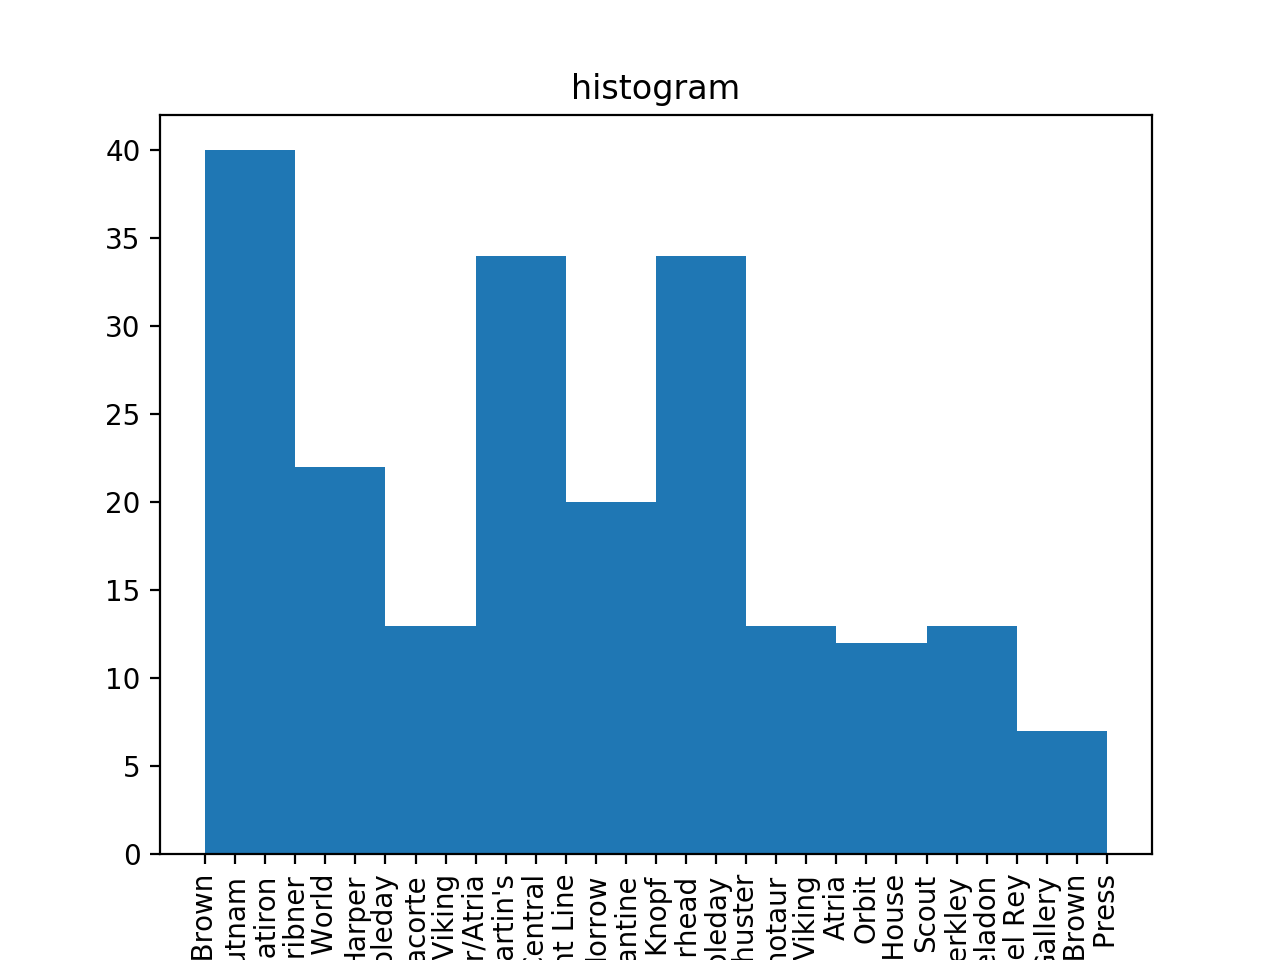

In [91]:
plt.hist(titles_df["publisher"]) 
plt.title("histogram") 
plt.xticks(rotation=90)
plt.show()

In [ ]:
# todo: line chart of popularity of a title, author, publisher over time